In [61]:
import nltools
from nltools.data import Brain_Data, Adjacency
from nltools.mask import expand_mask
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
from sklearn.utils import shuffle

    
import os

% matplotlib inline

print(nltools.__version__)

0.3.5


In [121]:
## Set up Folders

folder_path = "/Volumes/AdditionalStorage/ISC_Analysis"

## Set up Mask

mask = 'Auditory.nii.gz'
mask_region = "Auditory"
mask_path = os.path.join(folder_path, 'masked_csv', mask_region)

subjects = [ '145', '157', '168', '184', '200', '214',  '219', '220', '222', '223', '229', '245', '253', '257', '263',  '267', '270', '277']
num_subs = len(subjects)






In [122]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [124]:
##Pairwise by Pairwise

## Set up Video and Participants
actual = pd.DataFrame()
for video in range(4,6):


    behavioral = pd.read_csv(mask_path + "/video_" + str(video) + '_behavioralcorrelations.csv', index_col='Unnamed: 0')
    behavioral = behavioral.mask(np.tril(np.ones(behavioral.shape)).astype(np.bool))
    behavioral = behavioral.stack().reset_index()[0]
    #behavioral = shuffle(behavioral).reset_index()[0]


    fMRI = pd.read_csv(mask_path + "/video_" + str(video) + '_fMRIcorrelations.csv',index_col='Unnamed: 0')
    fMRI = fMRI.mask(np.tril(np.ones(fMRI.shape)).astype(np.bool))
    fMRI = fMRI.stack().reset_index()[0]

    #Concatenate Data Frame

    corrs = pd.concat([behavioral, fMRI], axis=1)
    corrs.columns = ['behav', 'scan']

    # Fischer Z transform correlations
    corrs['z_behav'] = 0.5*np.log((1+corrs['behav'])/(1-corrs['behav']))
    corrs['z_behav'] = pd.to_numeric(corrs['z_behav'], errors='coerce')

    corrs['z_scan'] = 0.5*np.log((1+corrs['scan'])/(1-corrs['scan']))
    corrs['z_scan'] = pd.to_numeric(corrs['z_scan'], errors='coerce')
    corrs = corrs.replace([np.inf, -np.inf], np.nan)

    # Compute Correlation
    corrs=corrs.dropna()
    corr_values = scipy.stats.pearsonr(corrs['z_behav'], corrs['z_scan'])

    actual = actual.append([corr_values[0]])
    #null = null.append([corr_values[0]])

    #Plot
    plt.figure()
    scat1 = sns.regplot(x="z_behav", y ="z_scan", data=corrs)

    plt.title(f'Video {video}  |  Corr: {corr_values[0]: .3f}  |  P: {corr_values[1]: .3f}')
    plt.xlabel('Behavioral Coefficients')
    plt.ylabel('Scan Coefficients')



%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=80);

plt.hist(null, **kwargs);
plt.hist(actual, **kwargs);





FileNotFoundError: File b'/Volumes/AdditionalStorage/ISC_Analysis/masked_csv/Auditory/video_4_behavioralcorrelations.csv' does not exist

In [125]:
## Average
video_sum = pd.DataFrame()
for video in range(1,15):


    behavioral = pd.read_csv(mask_path + "/video_" + str(video) + '_behavioralcorrelations.csv', index_col='Unnamed: 0')
    behavioral = behavioral.mask(np.tril(np.ones(behavioral.shape)).astype(np.bool))
    behavioral = behavioral.stack().reset_index()[0]


    fMRI = pd.read_csv(mask_path + "/video_" + str(video) + '_fMRIcorrelations.csv',index_col='Unnamed: 0')
    fMRI = fMRI.mask(np.tril(np.ones(fMRI.shape)).astype(np.bool))
    fMRI = fMRI.stack().reset_index()[0]

    #Concatenate Data Frame

    corrs = pd.concat([behavioral, fMRI], axis=1)
    corrs.columns = ['behav', 'scan']

    # Fischer Z transform correlations
    corrs['z_behav'] = 0.5*np.log((1+corrs['behav'])/(1-corrs['behav']))
    corrs['z_behav'] = pd.to_numeric(corrs['z_behav'], errors='coerce')

    corrs['z_scan'] = 0.5*np.log((1+corrs['scan'])/(1-corrs['scan']))
    corrs['z_scan'] = pd.to_numeric(corrs['z_scan'], errors='coerce')

    video_sum = video_sum.append([[video, corrs['z_behav'].mean(), corrs['z_scan'].mean()]])
    
video_sum

FileNotFoundError: File b'/Volumes/AdditionalStorage/ISC_Analysis/masked_csv/Auditory/video_1_behavioralcorrelations.csv' does not exist

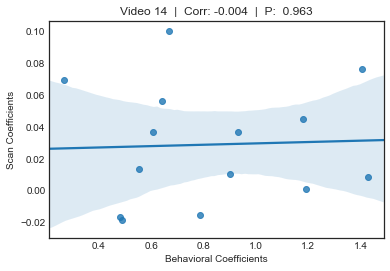

In [119]:
  #Plot
    
video_sum.columns = ['index', 'z_behav', 'z_scan']
plt.figure()
scat1 = sns.regplot(x='z_behav', y ='z_scan', data=video_sum)

plt.title(f'Video {video}  |  Corr: {corr_values[0]: .3f}  |  P: {corr_values[1]: .3f}')
plt.xlabel('Behavioral Coefficients')
plt.ylabel('Scan Coefficients')
